In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('data/kc_house_data.csv')
df.shape

(21613, 21)

### Exploratory Data Analysis

In [3]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [4]:
# let's check unique values
columns=df.columns
for col in columns:
    print(col,':\n',df[col].unique())
    print(df[col].value_counts())
    print('\n',20*'**','\n')

id :
 [7129300520 6414100192 5631500400 ... 1523300141  291310100 1523300157]
795000620     3
8651510380    2
2568300045    2
9353300600    2
4139480200    2
             ..
2767603649    1
1446403617    1
5602000275    1
1786200010    1
1523300157    1
Name: id, Length: 21436, dtype: int64

 **************************************** 

date :
 ['20141013T000000' '20141209T000000' '20150225T000000' '20150218T000000'
 '20140512T000000' '20140627T000000' '20150115T000000' '20150415T000000'
 '20150312T000000' '20150403T000000' '20140527T000000' '20140528T000000'
 '20141007T000000' '20150124T000000' '20140731T000000' '20140529T000000'
 '20141205T000000' '20150424T000000' '20140514T000000' '20140826T000000'
 '20140703T000000' '20140516T000000' '20141120T000000' '20141103T000000'
 '20140626T000000' '20141201T000000' '20140624T000000' '20150302T000000'
 '20141110T000000' '20141203T000000' '20140613T000000' '20141230T000000'
 '20150213T000000' '20140620T000000' '20140715T000000' '20140811T000000

array([[<Axes: title={'center': 'id'}>,
        <Axes: title={'center': 'price'}>,
        <Axes: title={'center': 'bedrooms'}>,
        <Axes: title={'center': 'bathrooms'}>],
       [<Axes: title={'center': 'sqft_living'}>,
        <Axes: title={'center': 'sqft_lot'}>,
        <Axes: title={'center': 'floors'}>,
        <Axes: title={'center': 'waterfront'}>],
       [<Axes: title={'center': 'view'}>,
        <Axes: title={'center': 'condition'}>,
        <Axes: title={'center': 'grade'}>,
        <Axes: title={'center': 'sqft_above'}>],
       [<Axes: title={'center': 'sqft_basement'}>,
        <Axes: title={'center': 'yr_built'}>,
        <Axes: title={'center': 'yr_renovated'}>,
        <Axes: title={'center': 'zipcode'}>],
       [<Axes: title={'center': 'lat'}>,
        <Axes: title={'center': 'long'}>,
        <Axes: title={'center': 'sqft_living15'}>,
        <Axes: title={'center': 'sqft_lot15'}>]], dtype=object)

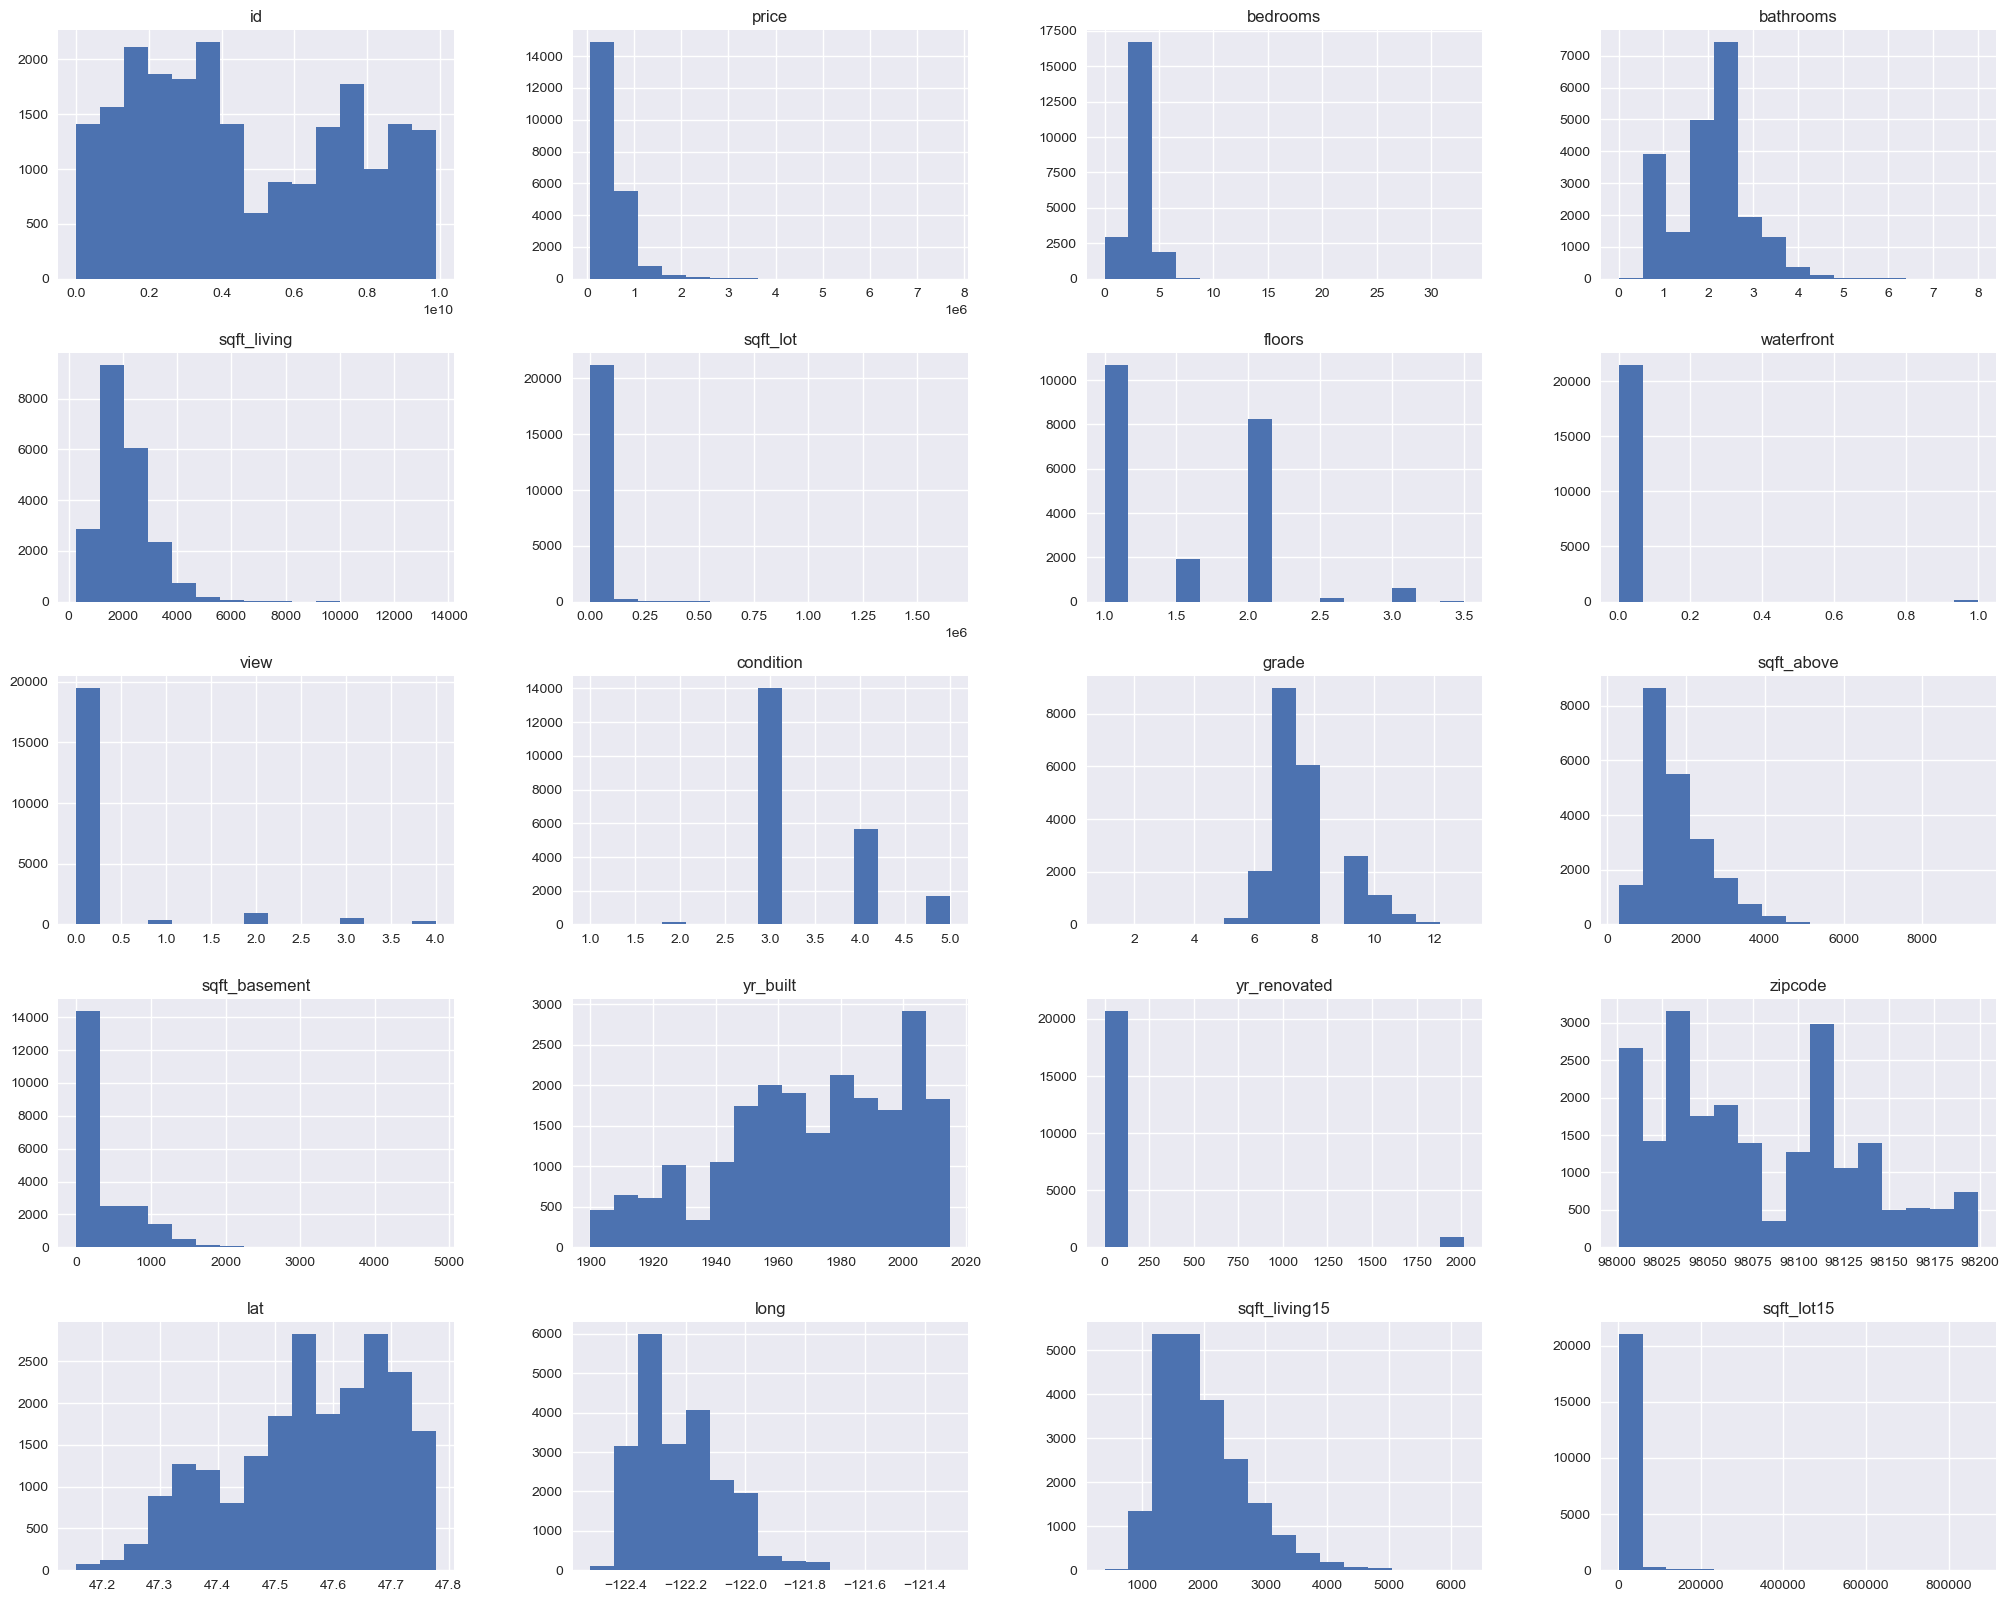

In [5]:
plt.style.use("seaborn")
df.hist(figsize=(25,20), bins=15)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [7]:
#Check For Duplicates
duplicates = df.duplicated()
duplicates.sum()

0

In [8]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [9]:
# Are there any missing values?
df.isna().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [10]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


<Axes: xlabel='price', ylabel='Density'>

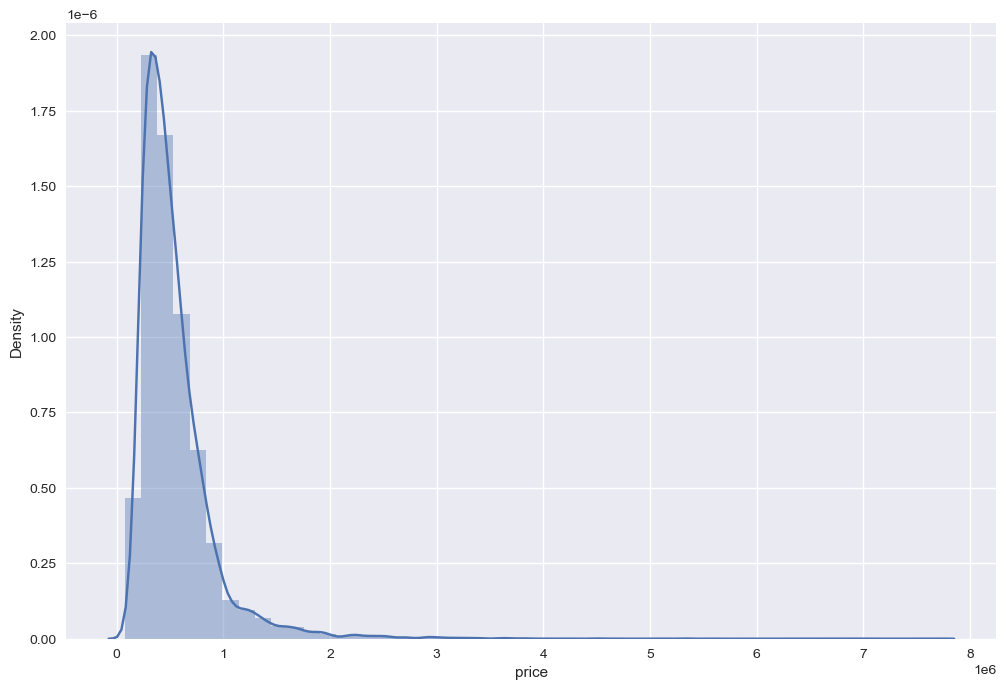

In [11]:
plt.figure(figsize=(12,8))
sns.distplot(df['price'])

<Axes: ylabel='count'>

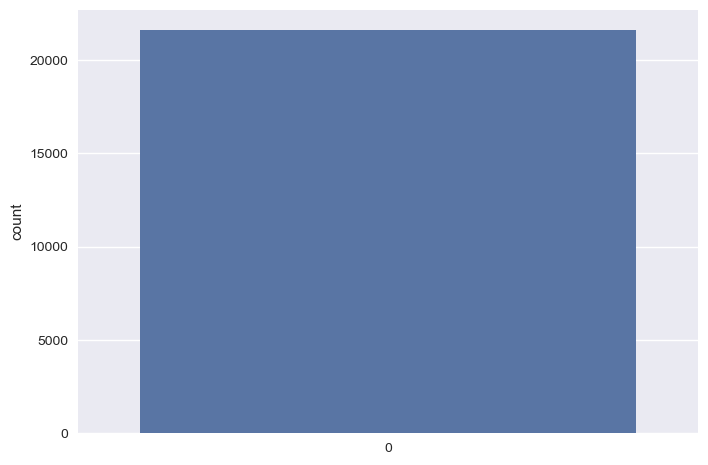

In [12]:
sns.countplot(df['bedrooms'])

<Axes: xlabel='price', ylabel='sqft_living'>

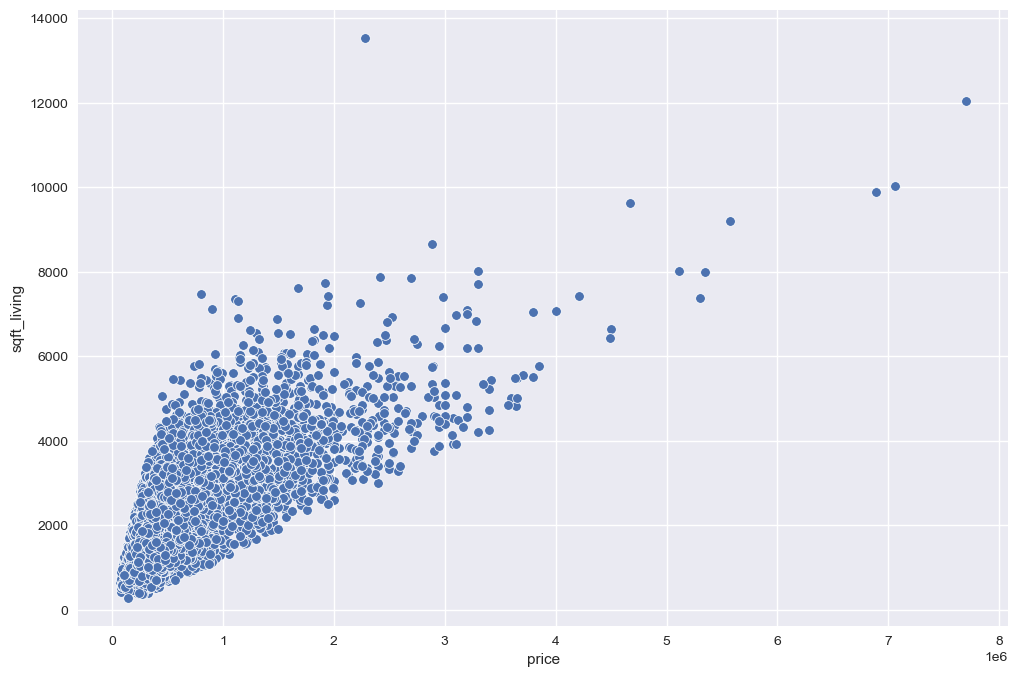

In [13]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='price',y='sqft_living',data=df)

<Axes: xlabel='bedrooms', ylabel='price'>

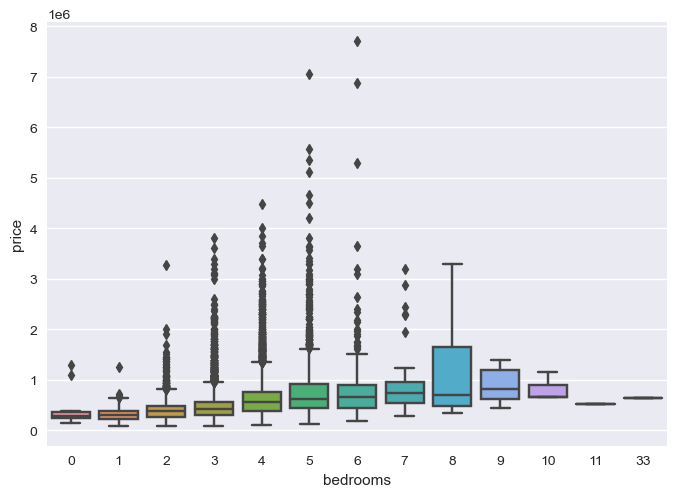

In [14]:
sns.boxplot(x='bedrooms',y='price',data=df)

<Axes: xlabel='price', ylabel='long'>

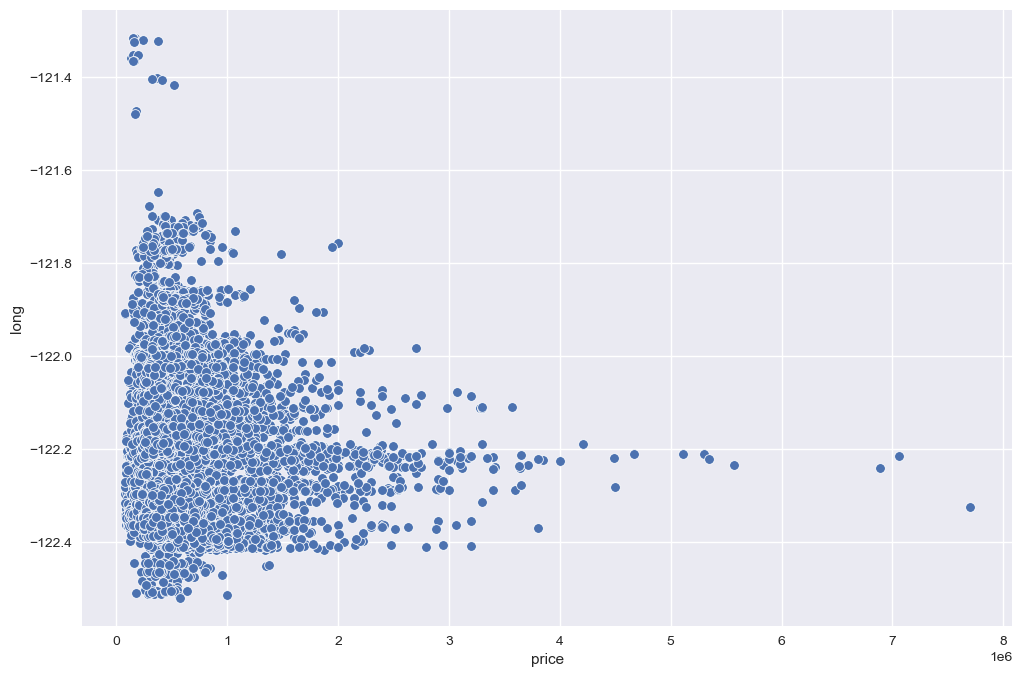

In [15]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='price',y='long',data=df)

<Axes: xlabel='price', ylabel='lat'>

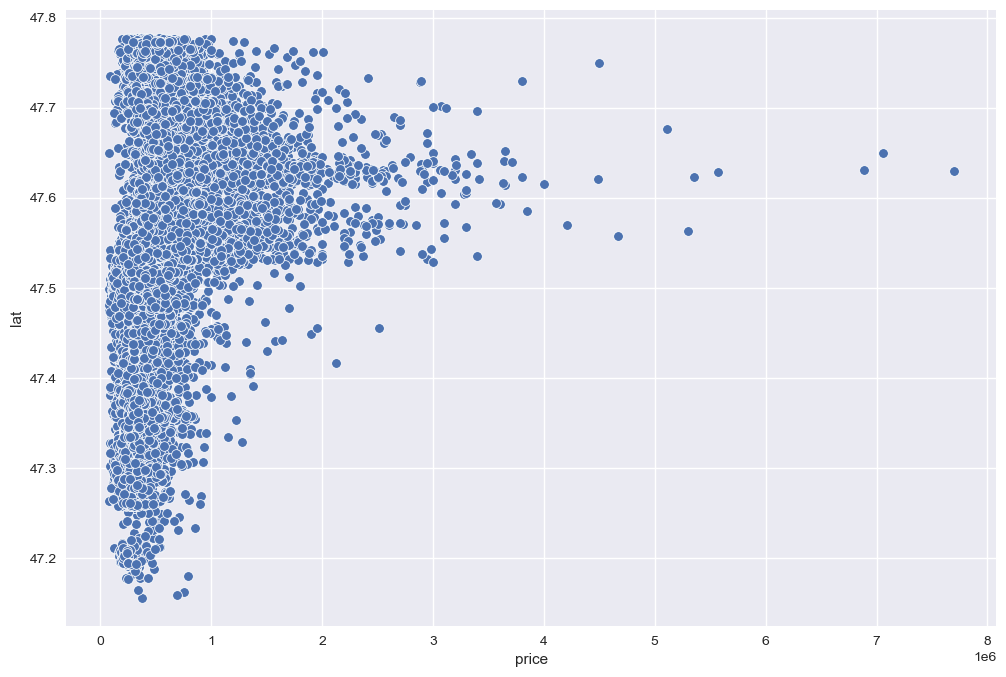

In [16]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='price',y='lat',data=df)

<Axes: xlabel='long', ylabel='lat'>

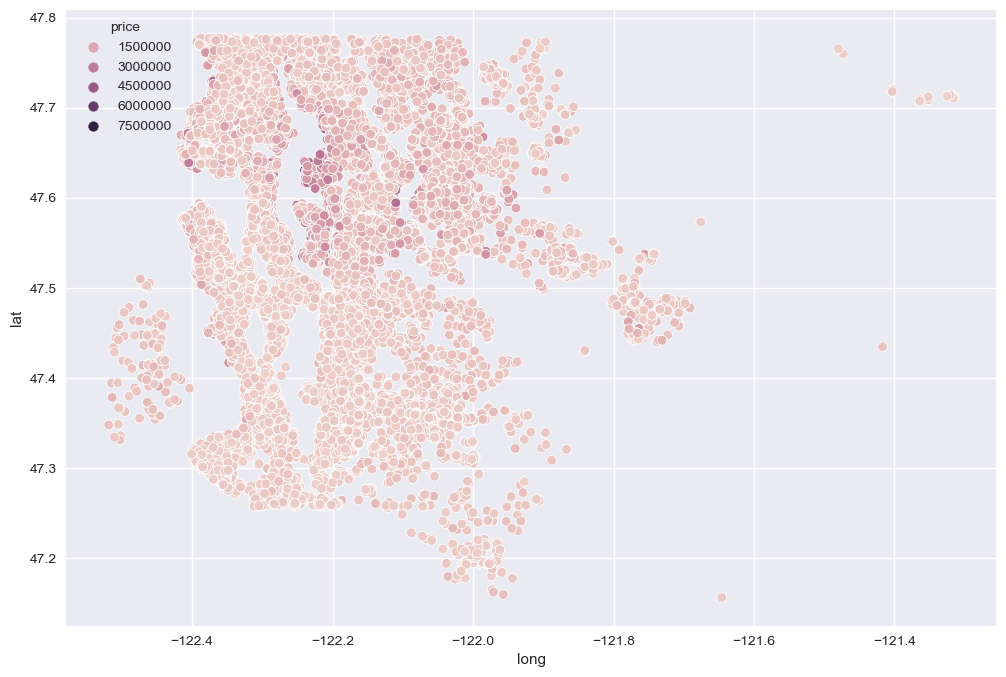

In [17]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='long',y='lat',data=df,hue='price')

In [18]:
df['date'] = pd.to_datetime(df['date'])

In [19]:
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month

In [20]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,month
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,...,0,1955,0,98178,47.5112,-122.257,1340,5650,2014,10
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,...,400,1951,1991,98125,47.7210,-122.319,1690,7639,2014,12
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,...,0,1933,0,98028,47.7379,-122.233,2720,8062,2015,2
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,...,910,1965,0,98136,47.5208,-122.393,1360,5000,2014,12
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,...,0,1987,0,98074,47.6168,-122.045,1800,7503,2015,2


<Axes: xlabel='year', ylabel='count'>

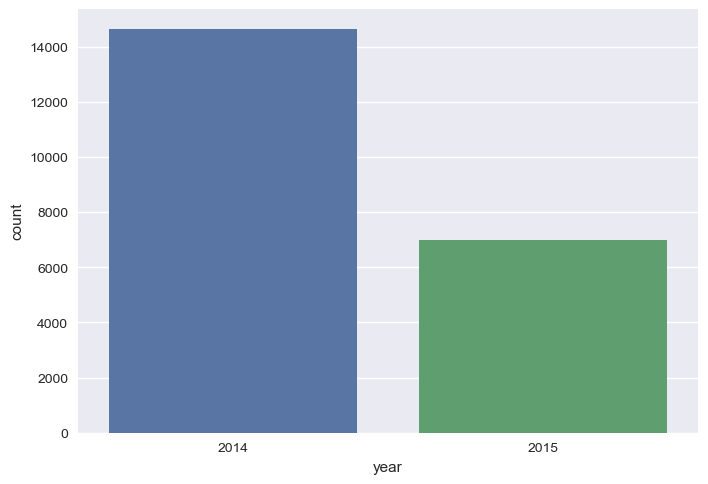

In [21]:
sns.countplot(x="year", data=df)

<Axes: ylabel='year'>

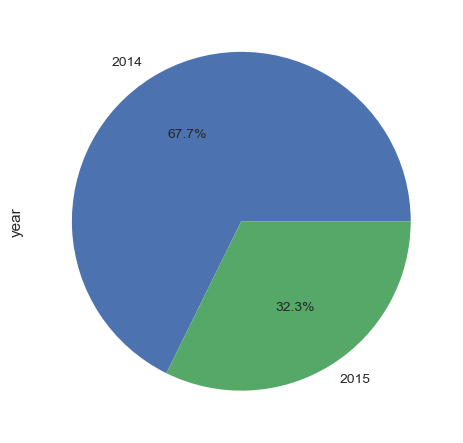

In [22]:
df['year'].value_counts().plot(kind='pie',autopct='%1.1f%%')

<Axes: xlabel='month', ylabel='count'>

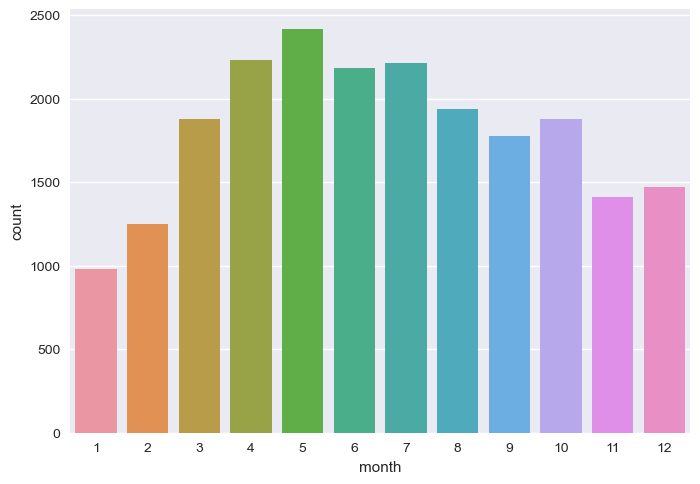

In [23]:
sns.countplot(x="month", data=df)

<Axes: ylabel='month'>

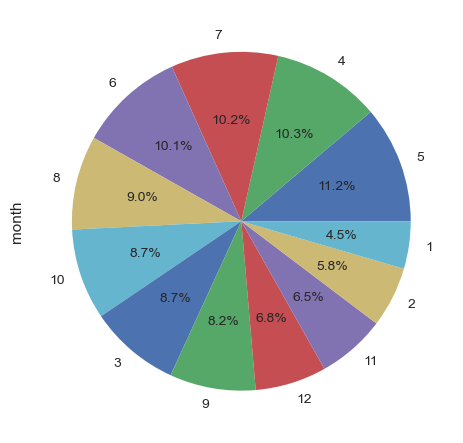

In [24]:
df['month'].value_counts().plot(kind='pie',autopct='%1.1f%%')

<Axes: xlabel='month'>

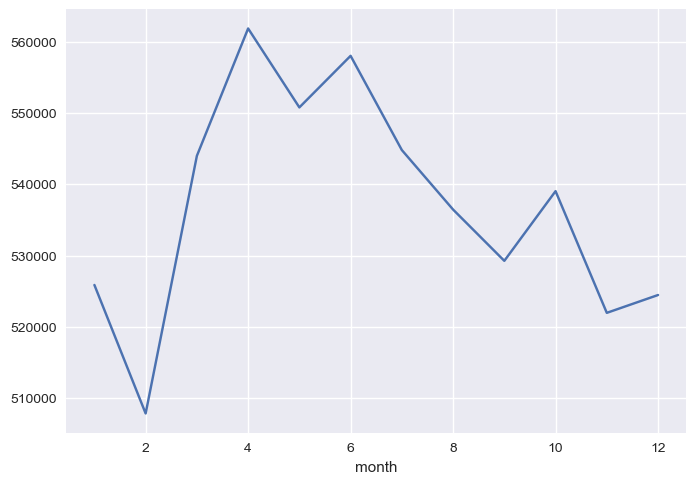

In [25]:
df.groupby('month').mean()['price'].plot()

In [26]:
print("largest number of bedrooms in dataset = ",max(df['bedrooms']))

largest number of bedrooms in dataset =  33


In [27]:
print('The oldest House : ', df['yr_built'].min())
print('The New house    : ', df['yr_built'].max())

The oldest House :  1900
The New house    :  2015


In [28]:
df.corr()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,month
id,1.000000,-0.016762,0.001286,0.005160,-0.012258,-0.132109,0.018525,-0.002721,0.011592,-0.023783,...,-0.005151,0.021380,-0.016907,-0.008224,-0.001891,0.020799,-0.002901,-0.138798,0.010128,-0.011708
price,-0.016762,1.000000,0.308350,0.525138,0.702035,0.089661,0.256794,0.266369,0.397293,0.036362,...,0.323816,0.054012,0.126434,-0.053203,0.307003,0.021626,0.585379,0.082447,0.003576,-0.010081
bedrooms,0.001286,0.308350,1.000000,0.515884,0.576671,0.031703,0.175429,-0.006582,0.079532,0.028472,...,0.303093,0.154178,0.018841,-0.152668,-0.008931,0.129473,0.391638,0.029244,-0.009838,-0.001533
bathrooms,0.005160,0.525138,0.515884,1.000000,0.754665,0.087740,0.500653,0.063744,0.187737,-0.124982,...,0.283770,0.506019,0.050739,-0.203866,0.024573,0.223042,0.568634,0.087175,-0.026596,0.007392
sqft_living,-0.012258,0.702035,0.576671,0.754665,1.000000,0.172826,0.353949,0.103818,0.284611,-0.058753,...,0.435043,0.318049,0.055363,-0.199430,0.052529,0.240223,0.756420,0.183286,-0.029038,0.011810
sqft_lot,-0.132109,0.089661,0.031703,0.087740,0.172826,1.000000,-0.005201,0.021604,0.074710,-0.008958,...,0.015286,0.053080,0.007644,-0.129574,-0.085683,0.229521,0.144608,0.718557,0.005468,-0.002369
floors,0.018525,0.256794,0.175429,0.500653,0.353949,-0.005201,1.000000,0.023698,0.029444,-0.263768,...,-0.245705,0.489319,0.006338,-0.059121,0.049614,0.125419,0.279885,-0.011269,-0.022315,0.014005
waterfront,-0.002721,0.266369,-0.006582,0.063744,0.103818,0.021604,0.023698,1.000000,0.401857,0.016653,...,0.080588,-0.026161,0.092885,0.030285,-0.014274,-0.041910,0.086463,0.030703,-0.004165,0.008132
view,0.011592,0.397293,0.079532,0.187737,0.284611,0.074710,0.029444,0.401857,1.000000,0.045990,...,0.276947,-0.053440,0.103917,0.084827,0.006157,-0.078400,0.280439,0.072575,0.001364,-0.005638
condition,-0.023783,0.036362,0.028472,-0.124982,-0.058753,-0.008958,-0.263768,0.016653,0.045990,1.000000,...,0.174105,-0.361417,-0.060618,0.003026,-0.014941,-0.106500,-0.092824,-0.003406,-0.045589,0.021978


(22.5, -0.5)

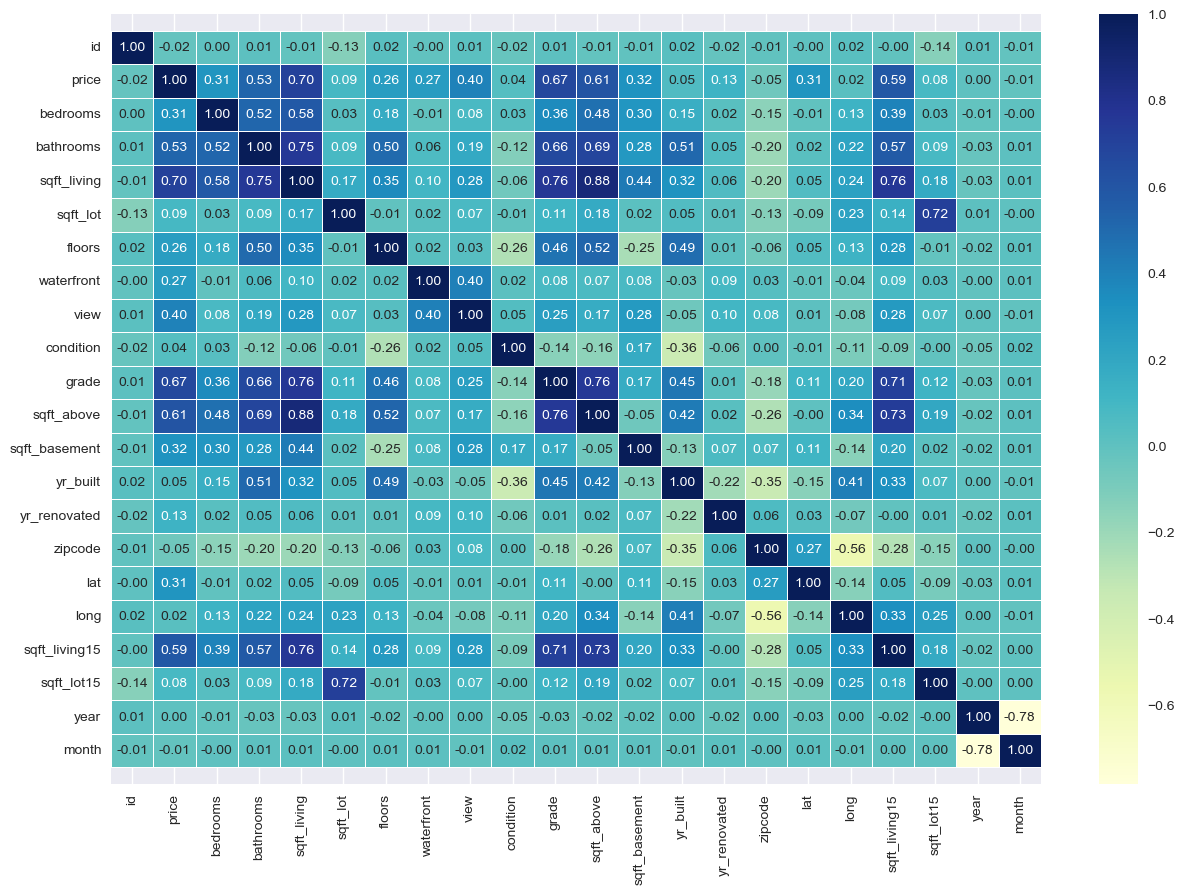

In [29]:
# Let's make our correlation matrix a little prettier
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(15, 10))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidths=0.5,
                 fmt=".2f",
                 cmap="YlGnBu");
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

In [30]:
df.drop(['id', 'date', ],axis = 1,inplace = True)

### Modeling

In [31]:
X = df.drop(['price'],axis=1) 

y = df['price']

In [32]:
X

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,month
0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,2014,10
1,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,2014,12
2,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062,2015,2
3,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,2014,12
4,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,2015,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509,2014,5
21609,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200,2015,2
21610,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007,2014,6
21611,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287,2015,1


In [33]:
y

0        221900.0
1        538000.0
2        180000.0
3        604000.0
4        510000.0
           ...   
21608    360000.0
21609    400000.0
21610    402101.0
21611    400000.0
21612    325000.0
Name: price, Length: 21613, dtype: float64

In [34]:
from sklearn.model_selection import train_test_split

# Split data into train and test sets
np.random.seed(42)

# Split into train & test set
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2)

In [35]:
print("Test Data = ",X_test.shape)
print("Train Data = ",X_train.shape)
print("Target Train = ",y_train.shape)
print("Target Test = ",y_test.shape)

Test Data =  (4323, 20)
Train Data =  (17290, 20)
Target Train =  (17290,)
Target Test =  (4323,)


In [36]:
from sklearn.preprocessing import StandardScaler 
# Standard Scaler
std_scale = StandardScaler()
X_train = std_scale.fit_transform(X_train)


X_test = std_scale.transform(X_test)

In [37]:
import pickle
pickle.dump(std_scale,open('scaling.pkl','wb'))

In [38]:
X_train

array([[-0.39526335, -0.47445144, -0.32393262, ...,  0.01344043,
        -0.68884041, -0.50783343],
       [-1.46896378, -1.45258323, -1.18365301, ..., -0.28066159,
         1.45171507, -1.15040653],
       [-0.39526335, -1.45258323, -1.09547656, ..., -0.1789339 ,
         1.45171507, -1.47169308],
       ...,
       [-0.39526335,  0.50368036,  0.05081729, ..., -0.36604019,
        -0.68884041,  0.77731276],
       [-2.54266422, -1.77862716, -1.8670205 , ...,  0.08265159,
        -0.68884041, -0.18654689],
       [ 0.67843709,  0.50368036,  1.16404497, ..., -0.24443927,
         1.45171507, -1.15040653]])

In [39]:
X_test

array([[ 0.67843709,  0.17763643, -0.00429299, ..., -0.18256703,
        -0.68884041,  1.09859931],
       [ 1.75213752,  1.15576822,  0.91053768, ..., -0.23404851,
        -0.68884041,  0.45602621],
       [ 0.67843709,  0.50368036,  1.86945657, ..., -0.11044936,
        -0.68884041,  0.45602621],
       ...,
       [ 0.67843709,  0.50368036,  0.39690986, ..., -0.30246038,
        -0.68884041,  1.09859931],
       [ 0.67843709, -0.47445144,  0.19410402, ..., -0.10808783,
        -0.68884041,  1.7411724 ],
       [ 0.67843709,  0.50368036,  0.54680982, ..., -0.24443927,
        -0.68884041,  1.7411724 ]])

In [40]:
from sklearn.linear_model import LinearRegression
LR = LinearRegression()
LR.fit(X_train,y_train)

LinearRegression()

In [41]:
pred = LR.predict(X_test)

In [42]:
print(pred)

[ 454240.39020618  744601.60288281 1226970.37962594 ...  414657.39639053
  612733.35836934  436433.80212186]


In [43]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
print('LinearRegression MSE :', mean_squared_error(y_test, pred))
print('LinearRegression r2_score :', r2_score(y_test, pred))

LinearRegression MSE : 44964839322.15577
LinearRegression r2_score : 0.702567686180671


In [44]:
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.linear_model import LinearRegression, SGDRegressor
# Model
sgd = SGDRegressor()
sgd.fit(X_train, y_train)

# Prediction
pred2 = sgd.predict(X_test)

In [45]:
from numpy.ma.core import floor
# Performance Measure
sgd_mse = mean_squared_error(y_test, pred2)
sgd_r2 = r2_score(y_test, pred2)

print("MSE =",sgd_mse)
print("R2 = ",floor(sgd_r2*100),"%") 

MSE = 45411724672.06347
R2 =  69.0 %


In [46]:
# Import necessary libraries
import pandas as pd
from sklearn.linear_model import SGDRegressor
from sklearn.model_selection import  GridSearchCV
# Define the hyperparameters to tune
params = {
    'learning_rate': ['constant', 'optimal', 'invscaling'],
    'penalty': ['l1', 'l2', 'elasticnet'],
    'alpha': [0.0001,0.001,0.01,0.1]
   
}
# Use GridSearchCV to tune the hyperparameters
grid = GridSearchCV(sgd, params, cv=5)
grid.fit(X_train, y_train)

# Print the best hyperparameters
print(grid.best_params_)

# Use the best hyperparameters to train the model
sgd = SGDRegressor(**grid.best_params_)
sgd.fit(X_train, y_train)

# Evaluate the model on the testing set
y_pred = sgd.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
sgd_r3 = r2_score(y_test, y_pred)
print(f"Mean squared error = {mse}")
print(f"R2 = {round(sgd_r3*100)} % ")

{'alpha': 0.1, 'learning_rate': 'optimal', 'penalty': 'l1'}
Mean squared error = 44973498894.10109
R2 = 70 % 


### Make Prediction

In [47]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,month
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,...,0,1955,0,98178,47.5112,-122.257,1340,5650,2014,10
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,...,400,1951,1991,98125,47.7210,-122.319,1690,7639,2014,12
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,...,0,1933,0,98028,47.7379,-122.233,2720,8062,2015,2
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,...,910,1965,0,98136,47.5208,-122.393,1360,5000,2014,12
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,...,0,1987,0,98074,47.6168,-122.045,1800,7503,2015,2


In [48]:
# Export current clean dataframe
df.to_csv("data/df_clean.csv" , index=False)

In [49]:
df = pd.read_csv('data/df_clean.csv')
df.shape

(21613, 21)

In [50]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,month
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,...,0,1955,0,98178,47.5112,-122.257,1340,5650,2014,10
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,...,400,1951,1991,98125,47.7210,-122.319,1690,7639,2014,12
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,...,0,1933,0,98028,47.7379,-122.233,2720,8062,2015,2
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,...,910,1965,0,98136,47.5208,-122.393,1360,5000,2014,12
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,...,0,1987,0,98074,47.6168,-122.045,1800,7503,2015,2


In [51]:
df.drop(['price'],axis = 1,inplace = True)

In [52]:
df.iloc[0]

bedrooms             3.0000
bathrooms            1.0000
sqft_living       1180.0000
sqft_lot          5650.0000
floors               1.0000
waterfront           0.0000
view                 0.0000
condition            3.0000
grade                7.0000
sqft_above        1180.0000
sqft_basement        0.0000
yr_built          1955.0000
yr_renovated         0.0000
zipcode          98178.0000
lat                 47.5112
long              -122.2570
sqft_living15     1340.0000
sqft_lot15        5650.0000
year              2014.0000
month               10.0000
Name: 0, dtype: float64

In [53]:
df.iloc[0].shape

(20,)

In [54]:
x = df.iloc[0]

In [57]:
reshaped_data = np.array(x).reshape(1, -1)

In [58]:
print(reshaped_data)

[[ 3.00000e+00  1.00000e+00  1.18000e+03  5.65000e+03  1.00000e+00
   0.00000e+00  0.00000e+00  3.00000e+00  7.00000e+00  1.18000e+03
   0.00000e+00  1.95500e+03  0.00000e+00  9.81780e+04  4.75112e+01
  -1.22257e+02  1.34000e+03  5.65000e+03  2.01400e+03  1.00000e+01]]


In [59]:
# Standard Scaler
std_scale.transform(reshaped_data)

array([[-0.39526335, -1.45258323, -0.985256  , -0.23556614, -0.91959976,
        -0.08499166, -0.30591651, -0.62542567, -0.55868959, -0.73753689,
        -0.65631017, -0.54725545, -0.20829394,  1.87578962, -0.35491059,
        -0.30507313, -0.94376477, -0.25704623, -0.68884041,  1.09859931]])

In [60]:
pred = LR.predict(reshaped_data)

In [61]:
print(pred)

[-5.40847556e+19]


In [62]:
import pickle

In [63]:
pickle.dump(LR,open('regression_model.pkl','wb'))

In [64]:
pickled_model=pickle.load(open('regression_model.pkl','rb'))

In [65]:
df.columns

Index(['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'year', 'month'],
      dtype='object')